In [74]:
from tensorflow import keras
import random
import numpy as np
import tensorflow as tf

In [85]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [117]:
all_data = np.concatenate((x_train, x_test))

In [118]:
max_value = float(all_data.max())
al_data_normalized = all_data.astype(np.float32) / max_value
x_train_normalized, x_valid_normalized = al_data_normalized[:-1000], al_data_normalized[-1000:]

In [139]:
all_y = np.concatenate((y_train, y_test))

In [140]:
y_train, y_valid = all_y[:-1000], all_y[-1000:]

In [105]:
x_train = x_train/255.0
x_test = x_test/255.0

In [119]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])

In [120]:
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28,28])
])

In [128]:
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

In [129]:
stacked_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))

In [130]:
history = stacked_ae.fit(x_train_normalized, x_train_normalized, epochs=10, validation_data=[x_valid_normalized, x_valid_normalized])

Epoch 1/10
2157/2157 [==============================] - 17s 8ms/step - loss: 0.3288 - val_loss: 0.3138
Epoch 2/10
2157/2157 [==============================] - 16s 7ms/step - loss: 0.3013 - val_loss: 0.3055
Epoch 3/10
2157/2157 [==============================] - 16s 8ms/step - loss: 0.2948 - val_loss: 0.3008
Epoch 4/10
2157/2157 [==============================] - 16s 7ms/step - loss: 0.2912 - val_loss: 0.3041
Epoch 5/10
2157/2157 [==============================] - 17s 8ms/step - loss: 0.2888 - val_loss: 0.2956
Epoch 6/10
2157/2157 [==============================] - 16s 7ms/step - loss: 0.2872 - val_loss: 0.2976
Epoch 7/10
2157/2157 [==============================] - 15s 7ms/step - loss: 0.2860 - val_loss: 0.2942
Epoch 8/10
2157/2157 [==============================] - 16s 7ms/step - loss: 0.2850 - val_loss: 0.2923
Epoch 9/10
2157/2157 [==============================] - 15s 7ms/step - loss: 0.2841 - val_loss: 0.2919
Epoch 10/10
2157/2157 [==============================] - 16s 8ms/step - l

In [79]:
import matplotlib.pyplot as plt

In [111]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [131]:
def show_reconstructions(model, n_images=10):
    reconstruction = model.predict(x_test[:n_images])
    fig = plt.figure(figsize=(n_images*1.5,3))
    for image_index in range(n_images):
        plt.subplot(2,n_images,1+image_index)
        plot_image(x_test[image_index])
        plt.subplot(2,n_images, 1+n_images+image_index)
        plot_image(reconstruction[image_index])

1/1 [==============================] - 0s 136ms/step


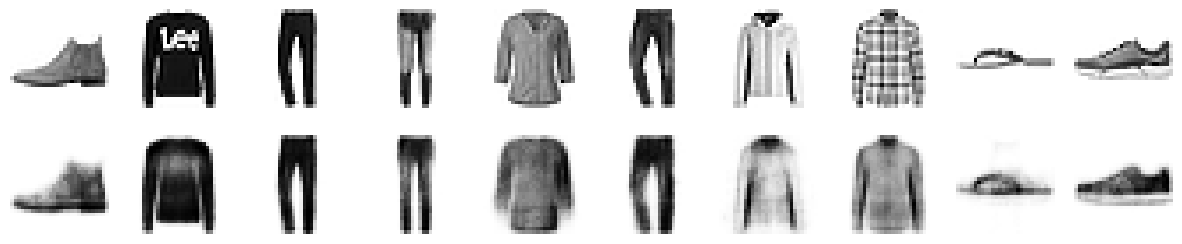

In [132]:
show_reconstructions(stacked_ae)

In [133]:
from sklearn.manifold import TSNE

In [135]:
x_valid_compressed = stacked_encoder.predict(x_valid_normalized)

32/32 [==============================] - 0s 6ms/step


In [136]:
tsne = TSNE()

In [137]:
x_valid_2d = tsne.fit_transform(x_valid_compressed)

e:\projects\personalprojects\ml_playground\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\projects\personalprojects\ml_playground\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


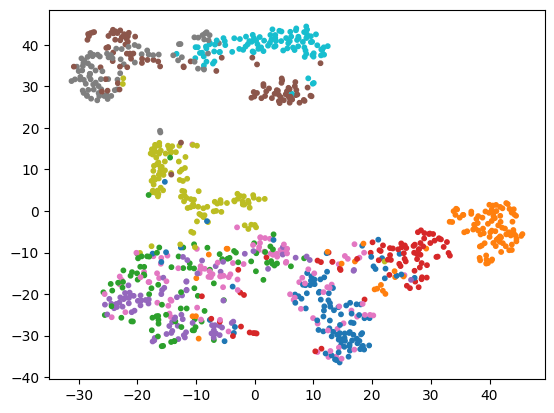

In [141]:
plt.scatter(x_valid_2d[:,0], x_valid_2d[:,1], c=y_valid, s=10, cmap='tab10')